<a href="https://colab.research.google.com/github/manucastilla/VisaoComputacional_aulas/blob/master/Aula%2003/Visa%CC%83o_Computacional_Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VISÃO COMPUTACIONAL - AULA 03**

**Objetivos da aula:**

*   conhecer o problema de intensificação de contraste
*   desenvolver solução para o problema de intensificação de contraste baseada em processamento puntual
*   conhecer o conceito de histograma de imagens
*   aplicar equalização de histogramas para intensificar contraste











## **PROBLEMA DE INTENSIFICAÇÃO DE CONTRASTE**

Vamos abrir e analisar visualmente a imagem abaixo... perceptualmente, qual o problema que ela apresenta ?

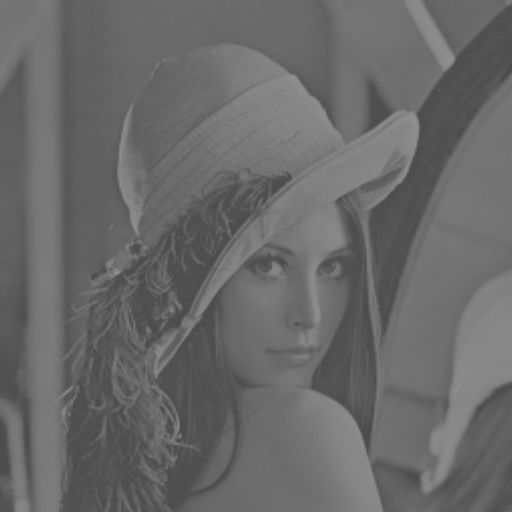

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import sys

img = cv2.cvtColor(cv2.imread("lenabc.png"), cv2.COLOR_BGR2GRAY)
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)

A imagem acima possui um problema comum chamado baixo contraste. Quando isto ocorre, temos uma concentração de cores (no caso acima, níveis de cinza) numa determinada região da imagem. 

## **EXERCÍCIO**

A estratégia básica para intensificar contraste é diminuir esta concentração, aumentando a distância entre as cores dos pixels da imagem. Utilizando o código abaixo, implemente a seguinte estratégia:

*   pixels "escuros" da imagem devem ficar mais escuros (ex. 20% mais escuros)
*   pixels "claros" da imagem devem ficar mais claros (ex. 20% mais claros)




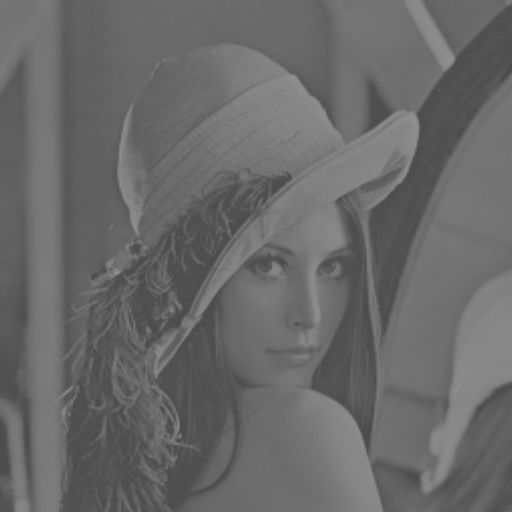

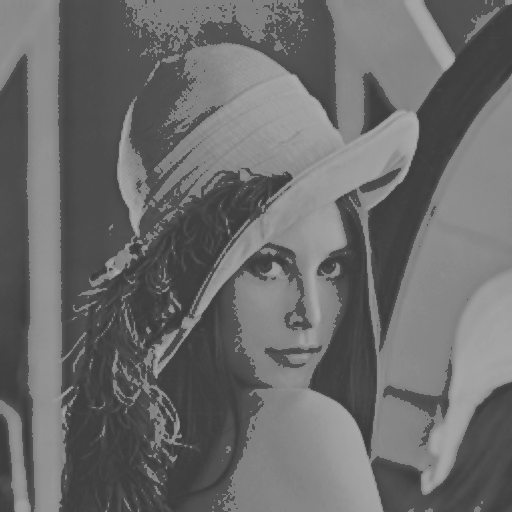

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import numpy as np

img = cv2.cvtColor(cv2.imread("lenabc.png"), cv2.COLOR_BGR2GRAY)
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)

linhas,colunas=img.shape

m=np.median(img)

for l in range(linhas):
  for c in range(colunas):
    if img[l][c]<m:
      img[l][c]*=0.8
    else:
      cl=1.2*img[l][c]
      if cl>255:
        img[l][c]=255
      else:
        img[l][c]=cl
      
cv2_imshow(img)
    


## **HISTOGRAMAS DE IMAGENS**

Percebemos que a estratégia anterior não solucinou de maneira adequada o problema da intensificação de contraste, pois estamos aumentando a distância de somente duas classes de cor ("claro" e "escuro"). Com a utilização do conceito de histograma, vamos conseguir analisar melhor a distribuição de cores e atuar em cima da distribuição de cores para intensificar constraste.

Um histograma de cores nos mostra qual é a quantidade de pixels por cada cor. Abaixo, temos um exemplo de como calcular o histograma de cores de uma imagem:

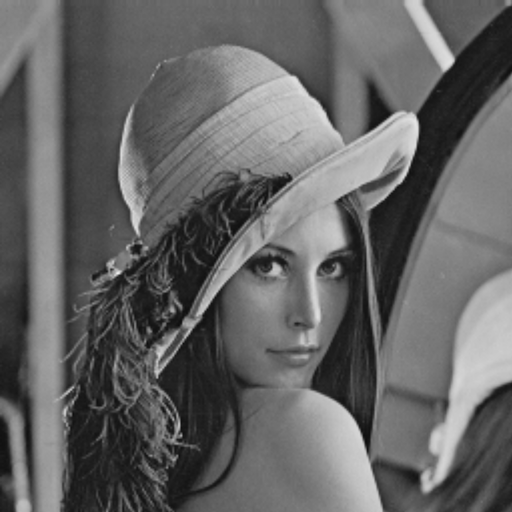

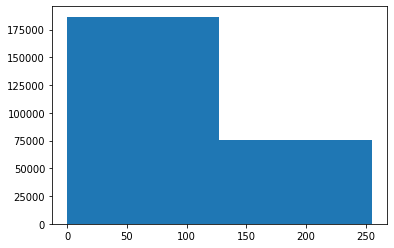

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.cvtColor(cv2.imread("lenagray.png"), cv2.COLOR_BGR2GRAY)
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)
h=plt.hist(img.ravel(),bins=2,range=[0,255]) #ravel() transforma a imagem num vetor 1D
plt.show()

## **ANALISANDO A IMAGEM POR HISTOGRAMAS**

Quando uma imagem nos parece nítida, possivelmente ela terá uma boa distribuição de cores. 

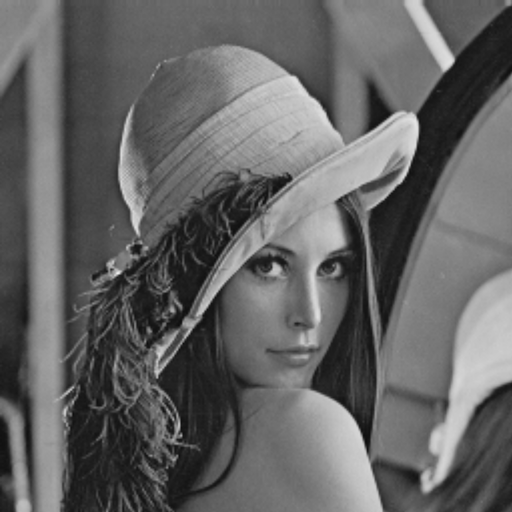

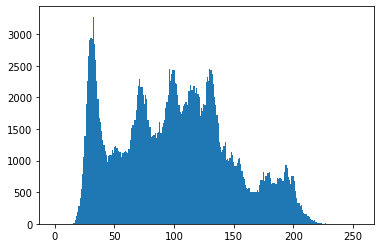

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.cvtColor(cv2.imread("lenagray.png"), cv2.COLOR_BGR2GRAY)
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)
plt.hist(img.ravel(),bins=256,range=[0,255]) #ravel() transforma a imagem num vetor 1D
plt.show()

Porém, se usarmos imagens mais claras ou mais escuras, teremos concentrações em determinadas regiões do histograma.

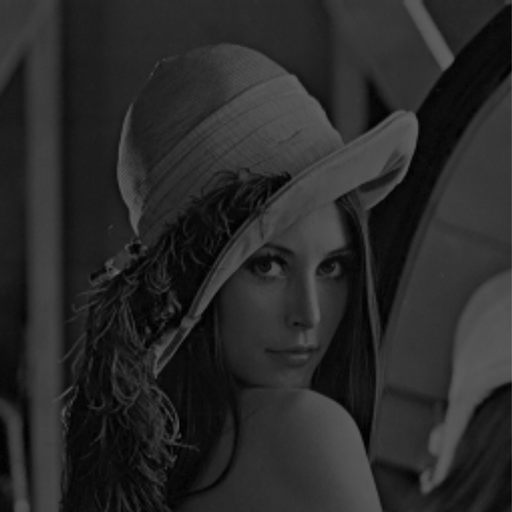

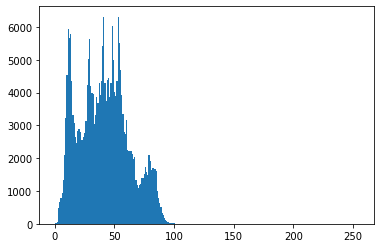

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.cvtColor(cv2.imread("lenadark.png"), cv2.COLOR_BGR2GRAY)
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)
plt.hist(img.ravel(),bins=256,range=[0,255]) #ravel() transforma a imagem num vetor 1D
plt.show()

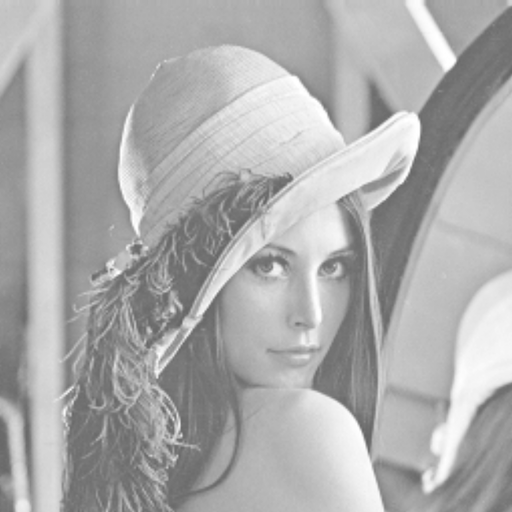

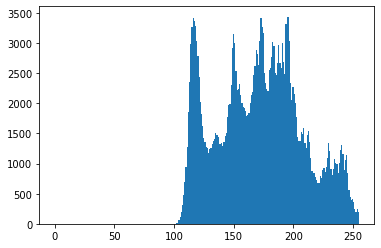

In [6]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.cvtColor(cv2.imread("lenabright.png"), cv2.COLOR_BGR2GRAY)
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)
plt.hist(img.ravel(),bins=256,range=[0,255]) #ravel() transforma a imagem num vetor 1D
plt.show()

Voltando ao problema da imagem com baixo contraste, vamos calcular e analisar seu histograma.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.cvtColor(cv2.imread("lenabc.png"), cv2.COLOR_BGR2GRAY)
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)    
plt.hist(img.ravel(),bins=256,range=[0,255]) #ravel() transforma a imagem num vetor 1D
plt.show()

Observando este histograma, notamos que ele está muito concentrado numa determinada região. O que precisamos fazer é redistribuir melhor estas cores, "esticando" horizontalmente o histograma.

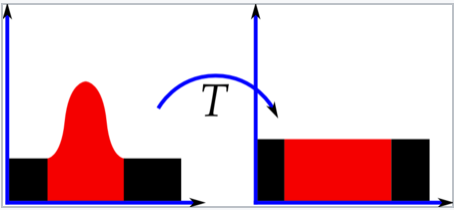

In [7]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread("histeq.png")
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)

Esta transformação pode ser feita de uma maneira muito simples em OpenCV.

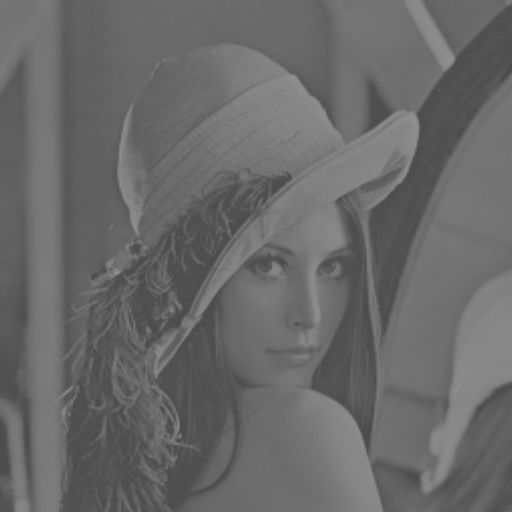

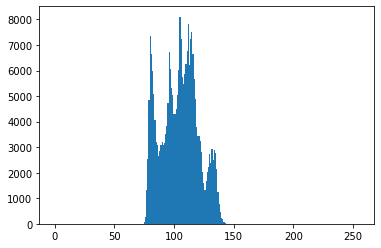

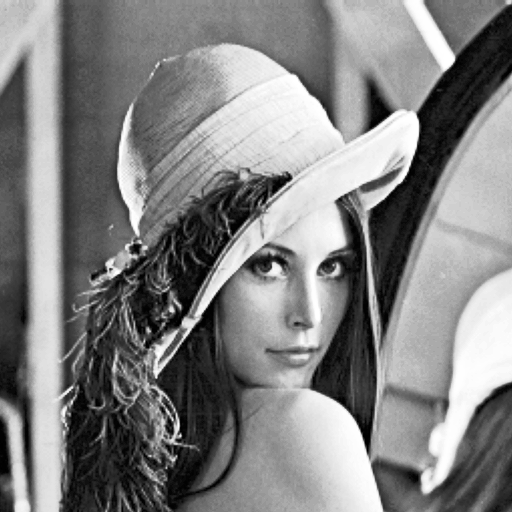

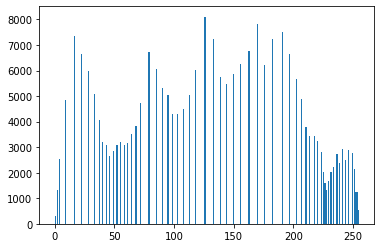

In [8]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.cvtColor(cv2.imread("lenabc.png"), cv2.COLOR_BGR2GRAY)
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)
plt.hist(img.ravel(),bins=256,range=[0,255]) 
plt.show()

imgeq=cv2.equalizeHist(img)
cv2_imshow(imgeq)
plt.hist(imgeq.ravel(),bins=256,range=[0,255]) 
plt.show()


## **DESAFIO**

Implementar a equalização de histograma manipulando o próprio histograma. Para isto, usar o algoritmo descrito abaixo (seção implementation).

https://en.wikipedia.org/wiki/Histogram_equalization

No código fornecido abaixo, hist representa o objeto do histograma. 

Dica: (1) Calcule primeiro a distribuição de probabilidade acumulada (cdf) do histograma
(2) use arrays mascarados do numpy


masked array



In [9]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.cvtColor(cv2.imread("lenabc.png"), cv2.COLOR_BGR2GRAY)
if img is None:
    sys.exit("Could not read the image.")
hist,bins = np.histogram(img.flatten(),256,[0,256])

#seu código começa aqui




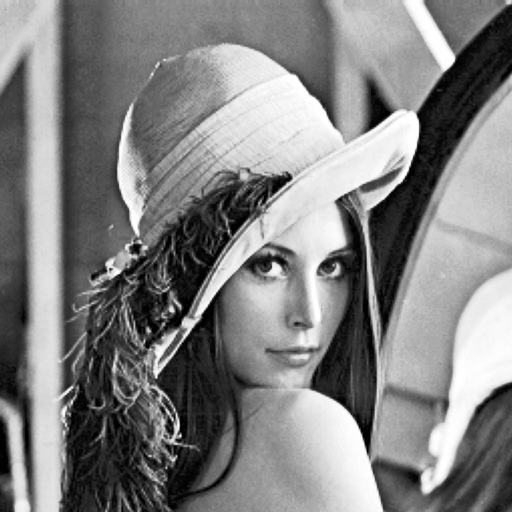

In [10]:
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
imgeq = cdf[img]
cv2_imshow(imgeq)